In [1]:
import logging
logging.basicConfig(level=logging.DEBUG)
import matplotlib.pyplot as plt

from profilebuilder import *

DEBUG:profilebuilder.profilebuilder:Geometry underdetermined in x-direction, using relative position...
DEBUG:profilebuilder.profilebuilder:Geometry underdetermined in z-direction, using relative position...
DEBUG:profilebuilder.profilebuilder:Geometry still underdetermined in x-direction.
DEBUG:profilebuilder.profilebuilder:Geometry underdetermined in x-direction, using relative position...
DEBUG:profilebuilder.profilebuilder:Geometry underdetermined in z-direction, using relative position...
DEBUG:profilebuilder.profilebuilder:Geometry underdetermined in x-direction, using relative position...
DEBUG:profilebuilder.profilebuilder:Geometry underdetermined in z-direction, using relative position...
DEBUG:profilebuilder.profilebuilder:Geometry still underdetermined in x-direction.
DEBUG:profilebuilder.profilebuilder:Geometry underdetermined in x-direction, using relative position...
DEBUG:profilebuilder.profilebuilder:Geometry underdetermined in z-direction, using relative position...


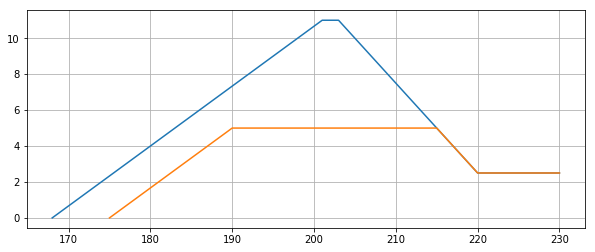

In [2]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,4))

p = Profile()
p.append(slope='1:3', z1=0., z2=11.)
p.append(slope=0, dx=2)
p.append(slope='-1:2', z2=2.5, x2=220.)
p.append(slope=0, dx=10)
p.plot(ax=ax)

p = Profile()
p.append(slope='1:3', z1=0., z2=5.)
p.append(slope=0, dx=25)
p.append(slope='-1:2', z2=2.5, x2=220.)
p.append(slope=0, dx=10)
p.plot(ax=ax)

ax.grid()


In [3]:
p.to_json()

'[{"z1":0.0,"z2":5.0,"slope":"1:3"},{"dx":25,"slope":0},{"x2":220.0,"z2":2.5,"slope":"-1:2"},{"dx":10,"slope":0}]'

In [4]:
p.get_geometry()

DEBUG:profilebuilder.profilebuilder:Geometry underdetermined in x-direction, using relative position...
DEBUG:profilebuilder.profilebuilder:Geometry underdetermined in z-direction, using relative position...
DEBUG:profilebuilder.profilebuilder:Geometry still underdetermined in x-direction.
DEBUG:profilebuilder.profilebuilder:Geometry underdetermined in x-direction, using relative position...
DEBUG:profilebuilder.profilebuilder:Geometry underdetermined in z-direction, using relative position...


([175.0, 190.0, 215.0, 220.0, 230.0], [0.0, 5.0, 5.0, 2.5, 2.5])

DEBUG:profilebuilder.profilebuilder:Geometry underdetermined in x-direction, using relative position...
DEBUG:profilebuilder.profilebuilder:Geometry underdetermined in z-direction, using relative position...
DEBUG:profilebuilder.profilebuilder:Geometry still underdetermined in x-direction.
DEBUG:profilebuilder.profilebuilder:Geometry underdetermined in x-direction, using relative position...
DEBUG:profilebuilder.profilebuilder:Geometry underdetermined in z-direction, using relative position...
DEBUG:profilebuilder.profilebuilder:Geometry underdetermined in x-direction, using relative position...
DEBUG:profilebuilder.profilebuilder:Geometry underdetermined in z-direction, using relative position...
DEBUG:profilebuilder.profilebuilder:Geometry still underdetermined in x-direction.
DEBUG:profilebuilder.profilebuilder:Geometry underdetermined in x-direction, using relative position...
DEBUG:profilebuilder.profilebuilder:Geometry underdetermined in z-direction, using relative position...


(<matplotlib.figure.Figure at 0x10673efd0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1067d2c88>)

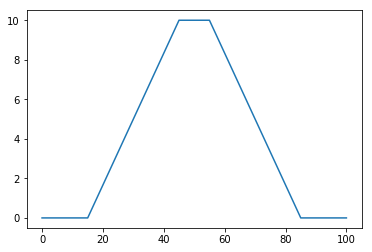

In [5]:
p = templates.DikeProfile()
p.plot()

DEBUG:profilebuilder.profilebuilder:Geometry underdetermined in x-direction, using relative position...
DEBUG:profilebuilder.profilebuilder:Geometry underdetermined in z-direction, using relative position...
DEBUG:profilebuilder.profilebuilder:Geometry still underdetermined in x-direction.
DEBUG:profilebuilder.profilebuilder:Geometry underdetermined in x-direction, using relative position...
DEBUG:profilebuilder.profilebuilder:Geometry underdetermined in z-direction, using relative position...
DEBUG:profilebuilder.profilebuilder:Geometry underdetermined in x-direction, using relative position...
DEBUG:profilebuilder.profilebuilder:Geometry underdetermined in z-direction, using relative position...
DEBUG:profilebuilder.profilebuilder:Geometry still underdetermined in x-direction.
DEBUG:profilebuilder.profilebuilder:Geometry underdetermined in x-direction, using relative position...
DEBUG:profilebuilder.profilebuilder:Geometry underdetermined in z-direction, using relative position...
DE

(<matplotlib.figure.Figure at 0x106818470>,
 <matplotlib.axes._subplots.AxesSubplot at 0x106a6ab00>)

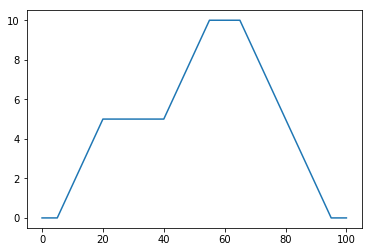

In [6]:
p = templates.DikeWithBermProfile(berm_width=20)
p.plot()